<a href="https://colab.research.google.com/github/ninjaabhinav/classical-ml-projects/blob/main/diabetis_progression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [14]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
X.shape

(442, 10)

In [16]:
y.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


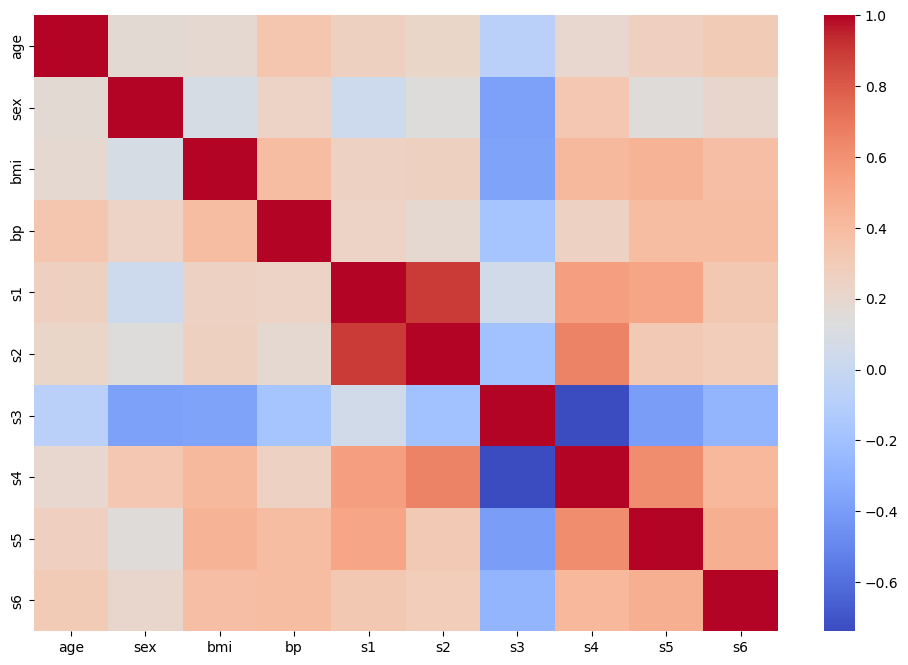

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(),cmap='coolwarm')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=5000),
    'ElasticNet': ElasticNet(max_iter=5000)
}
result = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    result[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }
result

{'LinearRegression': {'MSE': 2900.1936284934823,
  'RMSE': np.float64(53.853445836765935),
  'R2': 0.45260276297191926},
 'Ridge': {'MSE': 2892.0145657501726,
  'RMSE': np.float64(53.777454065343896),
  'R2': 0.45414652070698225},
 'Lasso': {'MSE': 2824.568094049959,
  'RMSE': np.float64(53.14666587896139),
  'R2': 0.46687670944102466},
 'ElasticNet': {'MSE': 2888.7047200595607,
  'RMSE': np.float64(53.74667171146099),
  'R2': 0.45477123774939965}}